<a href="https://colab.research.google.com/github/adg1205/Career-Switch-Prediction/blob/master/CSE422_Project_(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# **Data Analysis Part**

In [ ]:
careers=pd.read_csv("/content/drive/MyDrive/Career_Switch_Prediction_Dataset.csv")
careers.shape

(5000, 14)

In [ ]:
careers.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,0
gender,1113
relevent_experience,0
enrolled_university,107
education_level,118
major_discipline,724
experience,11
company_size,1571


In [ ]:
careers.shape

(5000, 14)

In [ ]:
careers = careers.drop(['enrollee_id'], axis = 1)

In [ ]:
careers

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,will_change_career
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,0,52,1
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,city_21,0.624,Female,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,NaN,1,114,1
4996,city_21,0.624,Male,No relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,64,1
4997,city_16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,>20,5000-9999,Pvt Ltd,>4,89,0
4998,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,10000+,Pvt Ltd,>4,20,1


In [ ]:
careers.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,will_change_career
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,0,52,1
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
5,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1
6,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0
7,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
8,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1
9,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0


In [ ]:
careers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    5000 non-null   object 
 1   city_development_index  5000 non-null   float64
 2   gender                  3887 non-null   object 
 3   relevent_experience     5000 non-null   object 
 4   enrolled_university     4893 non-null   object 
 5   education_level         4882 non-null   object 
 6   major_discipline        4276 non-null   object 
 7   experience              4989 non-null   object 
 8   company_size            3429 non-null   object 
 9   company_type            3379 non-null   object 
 10  last_new_job            4896 non-null   object 
 11  training_hours          5000 non-null   int64  
 12  will_change_career      5000 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 507.9+ KB


In [ ]:
numerical_data = careers.select_dtypes(include='number')
numerical_features = numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 3 numerical features: 

['city_development_index', 'training_hours', 'will_change_career']


In [ ]:
categorical_data = careers.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 10 categorical features: 

['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


In [ ]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
city_development_index,5000.0,0.82941,0.122429,0.448,0.743,0.903,0.92,0.949
training_hours,5000.0,65.02720,59.946693,1.000,23.000,47.000,88.00,336.000
will_change_career,5000.0,0.25240,0.434433,0.000,0.000,0.000,1.00,1.000


In [ ]:
categorical_data.describe().T

,count,unique,top,freq
city,5000,113,city_103,1163
gender,3887,3,Male,3507
relevent_experience,5000,2,Has relevent experience,3598
enrolled_university,4893,3,no_enrollment,3571
education_level,4882,5,Graduate,3037
major_discipline,4276,6,STEM,3786
experience,4989,22,>20,859
company_size,3429,8,50-99,813
company_type,3379,6,Pvt Ltd,2550
last_new_job,4896,6,1,2094


In [ ]:
numerical_data.var()

,0
city_development_index,0.014989
training_hours,3593.605981
will_change_career,0.188732


In [ ]:
numerical_data.skew()

,0
city_development_index,-1.013328
training_hours,1.853677
will_change_career,1.140333


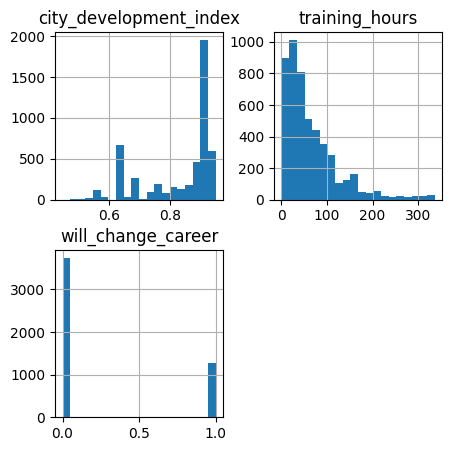

In [ ]:
numerical_data.hist(figsize=(5,5),bins=20)
plt.show()

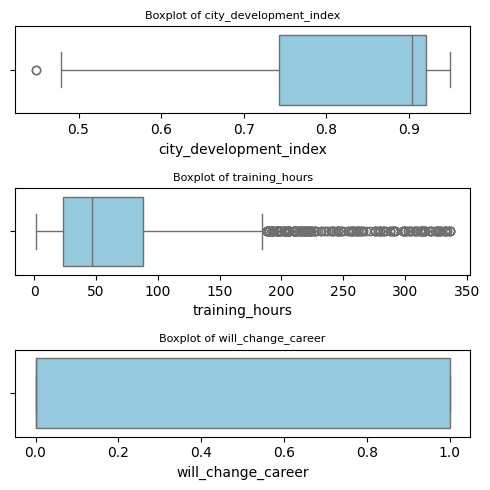

In [ ]:
numeric_cols = careers.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure
plt.figure(figsize=(5, 5))

# Plot boxplots for each numerical feature including the target variable 'OUTCOME'
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=careers[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=8)
    plt.tight_layout()

plt.show()

In [ ]:
numerical_data.nunique()

,0
city_development_index,85
training_hours,238
will_change_career,2


In [ ]:
numerical_data.isnull().sum()

,0
city_development_index,0
training_hours,0
will_change_career,0


In [ ]:
unique_counts=categorical_data.nunique()
print(unique_counts)

city                   113
gender                   3
relevent_experience      2
enrolled_university      3
education_level          5
major_discipline         6
experience              22
company_size             8
company_type             6
last_new_job             6
dtype: int64


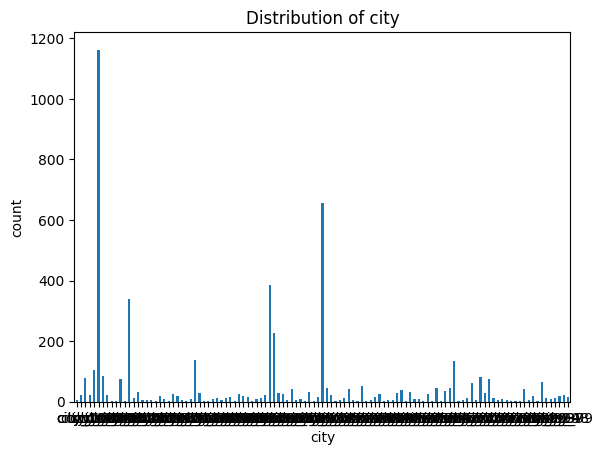

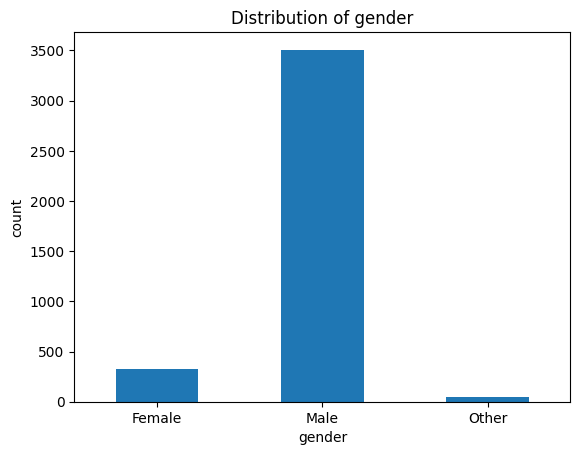

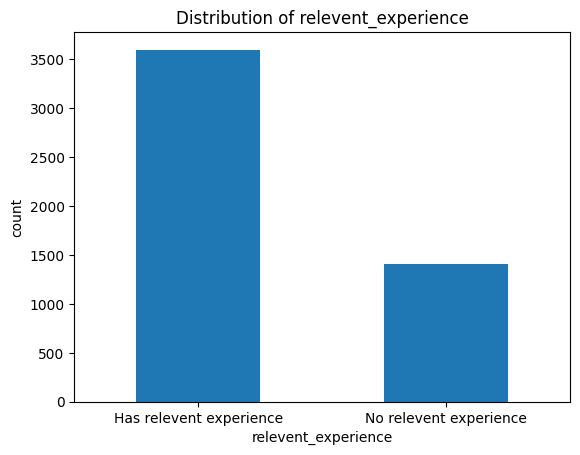

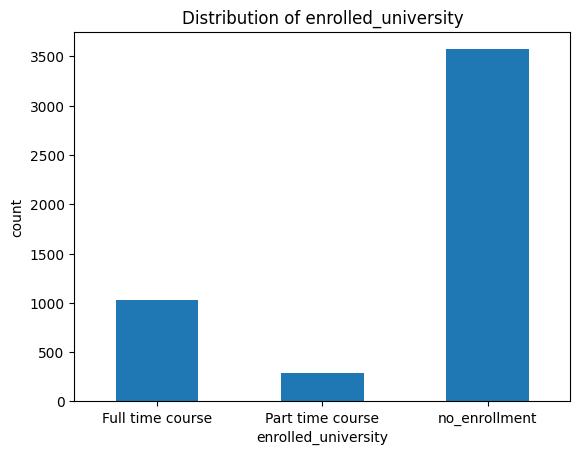

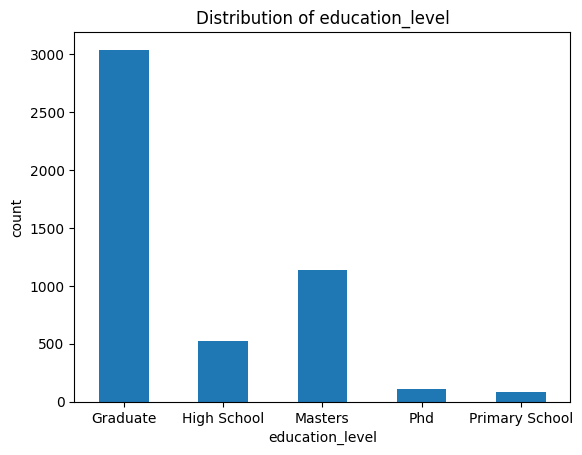

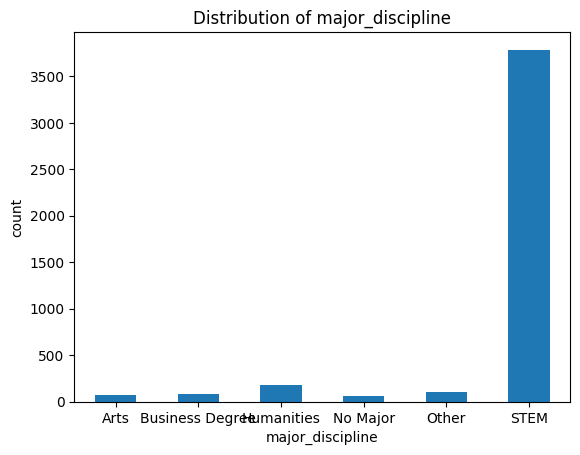

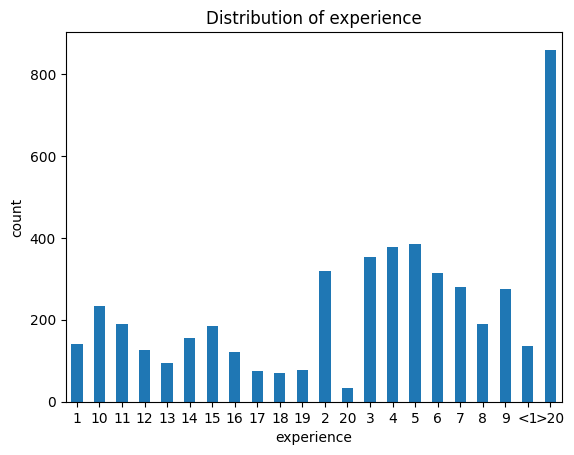

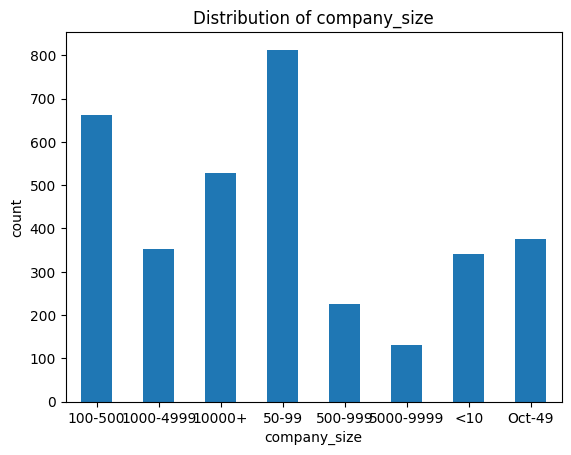

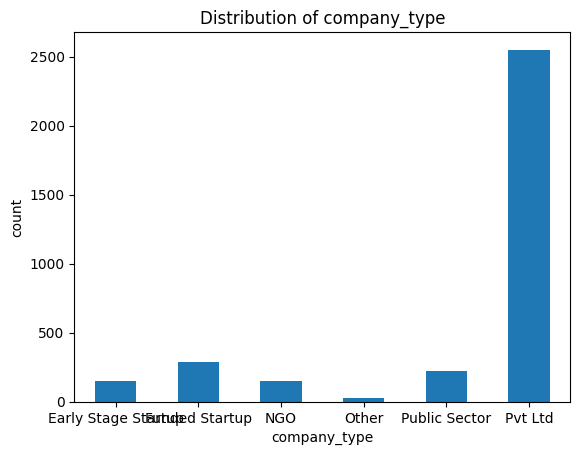

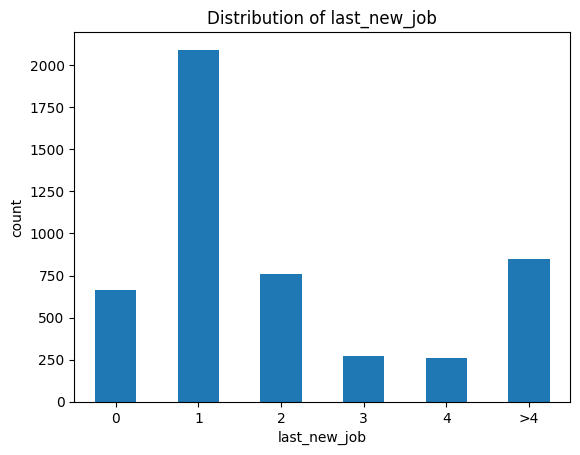

In [ ]:
for col in categorical_features:
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

In [ ]:
correlation_matrix = numerical_data.corr()
correlation_matrix

,city_development_index,training_hours,will_change_career
city_development_index,1.000000,0.004717,-0.346808
training_hours,0.004717,1.000000,-0.022170
will_change_career,-0.346808,-0.022170,1.000000


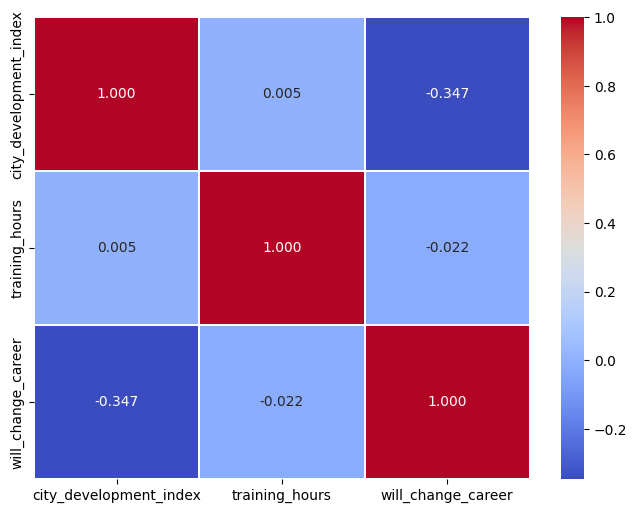

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

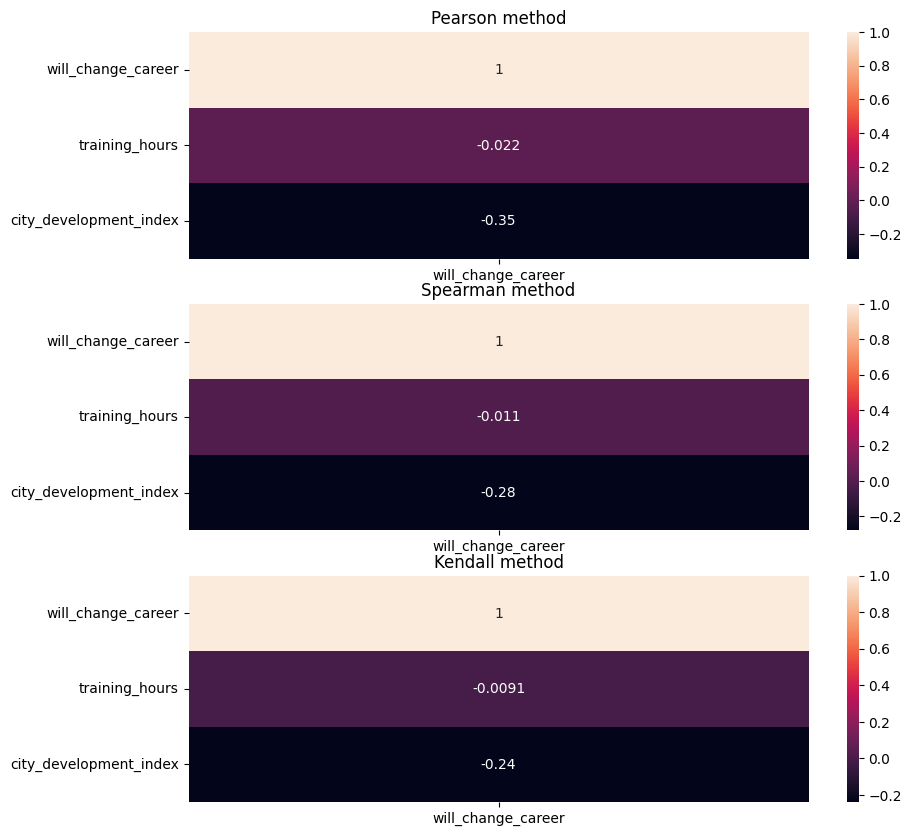

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(10, 10))
## Correlation coefficient using different methods
corr1 = numerical_data.corr('pearson')[['will_change_career']].sort_values(by='will_change_career', ascending=False)
corr2 = numerical_data.corr('spearman')[['will_change_career']].sort_values(by='will_change_career', ascending=False)
corr3 = numerical_data.corr('kendall')[['will_change_career']].sort_values(by='will_change_career', ascending=False)

#setting titles for each plot
ax[0].set_title('Pearson method')
ax[1].set_title('Spearman method')
ax[2].set_title('Kendall method')

## Generating heatmaps of each methods
sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

plt.show()

In [ ]:
#check Imbalance in data

#group instances based on the classes in OUTCOME variable
class_counts = careers.groupby("will_change_career").size()

columns=['will_change_career','count','percentage']
outcome=[0,1]
count=list()
percentage=list()

#Calculate the percentage of each value of the OUTCOME variable from total
for val in range(2):
    count.append(class_counts[val])
    percent=(class_counts[val]/5000)*100
    percentage.append(percent)

# Convert the calulated values into a dataframe
imbalance_df=pd.DataFrame(list(zip(outcome,count,percentage)),columns=columns)
imbalance_df

,will_change_career,count,percentage
0,0,3738,74.76
1,1,1262,25.24


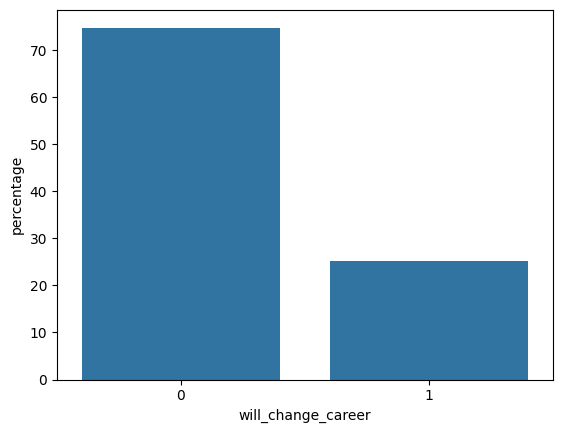

In [ ]:
sns.barplot(data=imbalance_df,x=imbalance_df['will_change_career'],y=imbalance_df['percentage'])
plt.show()

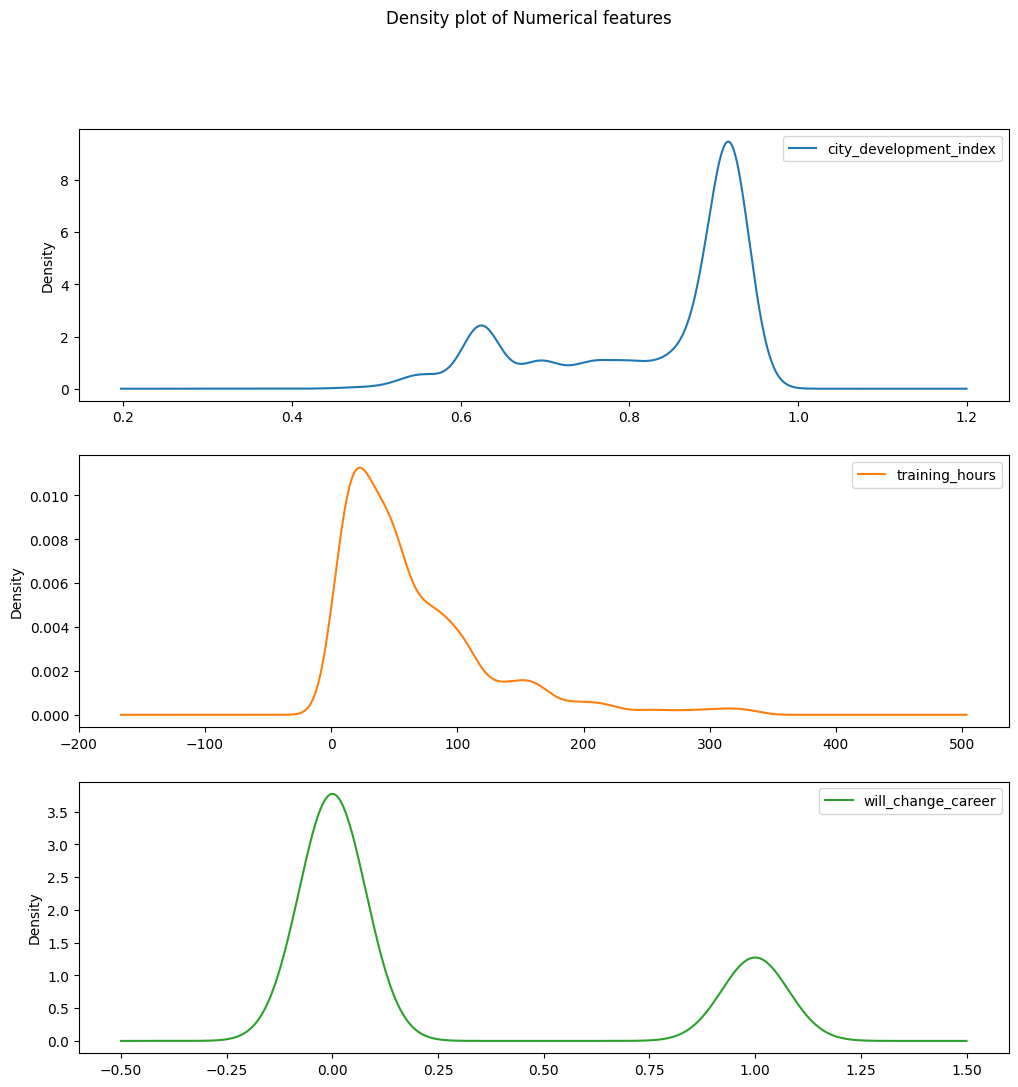

In [ ]:
numerical_data.plot(kind='density',figsize=(12,12),subplots=True, layout=(3,1),title="Density plot of Numerical features",sharex=False)
plt.show()

# **Data Pre Processing**

In [ ]:
# careers[categorical_features] = careers[categorical_features].fillna('Unknown')
careers.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,will_change_career
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,0,52,1
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
5,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1
6,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0
7,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
8,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1
9,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0


In [ ]:
from sklearn.impute import SimpleImputer
careers['experience'] = careers['experience'].replace({'<1': 0.5, '>20': 21})

impute = SimpleImputer(missing_values = np.nan, strategy='median')

impute.fit(careers[['experience']])

careers['experience'] = impute.transform(careers[['experience']])
careers['company_size'] = careers['company_size'].replace({'Oct-49': '10-49'})

In [ ]:
careers

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,will_change_career
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1,36,1
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0,83,0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.5,NaN,Pvt Ltd,0,52,1
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,city_21,0.624,Female,Has relevent experience,no_enrollment,Graduate,STEM,3.0,100-500,NaN,1,114,1
4996,city_21,0.624,Male,No relevent experience,no_enrollment,Graduate,STEM,3.0,100-500,Pvt Ltd,1,64,1
4997,city_16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,21.0,5000-9999,Pvt Ltd,>4,89,0
4998,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10.0,10000+,Pvt Ltd,>4,20,1


In [ ]:
careers['relevent_experience'] = careers['relevent_experience'].map({'Has relevent experience': 1,'No relevent experience': 0})
# careers['enrolled_university'] = careers['enrolled_university'].map({'no_enrollment': 0,'Part time course': 1,'Full time course': 2})
# careers['gender'] = careers['gender'].map({'Male': 2, 'Female': 1, 'Other': 0})

In [ ]:
careers = pd.get_dummies(careers, columns=[
    'city', 'gender', 'enrolled_university', 'education_level',
    'major_discipline', 'company_size', 'company_type', 'last_new_job'
], drop_first=False)


In [ ]:
careers.shape

(5000, 155)

In [ ]:
careers.columns

Index(['city_development_index', 'relevent_experience', 'experience',
       'training_hours', 'will_change_career', 'city_city_1', 'city_city_10',
       'city_city_100', 'city_city_101', 'city_city_102',
       ...
       'company_type_NGO', 'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd', 'last_new_job_0', 'last_new_job_1',
       'last_new_job_2', 'last_new_job_3', 'last_new_job_4',
       'last_new_job_>4'],
      dtype='object', length=155)

In [ ]:
careers

,city_development_index,relevent_experience,experience,training_hours,will_change_career,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_0,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4
0,0.920,1,21.0,36,1,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.776,0,15.0,47,0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0.624,0,5.0,83,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.789,0,0.5,52,1,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,0.767,1,21.0,8,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.624,1,3.0,114,1,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4996,0.624,0,3.0,64,1,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
4997,0.910,0,21.0,89,0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4998,0.920,1,10.0,20,1,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
careers = careers.replace(False, 0)
careers = careers.replace(True, 1)

<ipython-input-36-262a62052de3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  careers = careers.replace(True, 1)


In [ ]:
careers

,city_development_index,relevent_experience,experience,training_hours,will_change_career,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_0,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4
0,0.920,1,21.0,36,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.776,0,15.0,47,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.624,0,5.0,83,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.789,0,0.5,52,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.767,1,21.0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.624,1,3.0,114,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4996,0.624,0,3.0,64,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4997,0.910,0,21.0,89,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4998,0.920,1,10.0,20,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
correlation = careers.corr()
correlation

,city_development_index,relevent_experience,experience,training_hours,will_change_career,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_0,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4
city_development_index,1.000000,0.075128,0.332113,0.004717,-0.346808,0.004066,0.036423,0.059606,-0.150718,-0.030401,...,0.032653,0.012228,0.059861,0.044280,-0.136557,-0.048745,0.036188,0.028610,0.046971,0.137691
relevent_experience,0.075128,1.000000,0.349632,0.020138,-0.112887,0.001915,0.022695,-0.003029,-0.029944,-0.017259,...,0.019701,0.022978,-0.050608,0.277904,-0.376400,0.044363,0.095974,0.053073,0.074005,0.137363
experience,0.332113,0.349632,1.000000,-0.004686,-0.177800,-0.007367,0.023560,0.036673,-0.059395,0.003859,...,0.027850,0.011425,0.028855,0.130072,-0.245594,-0.191550,0.019883,0.038122,0.078778,0.409887
training_hours,0.004717,0.020138,-0.004686,1.000000,-0.022170,-0.018423,-0.000770,-0.016727,0.006823,0.017154,...,0.016517,0.020042,-0.022695,0.003181,-0.002839,-0.002225,-0.005814,0.010104,0.009932,-0.000134
will_change_career,-0.346808,-0.112887,-0.177800,-0.022170,1.000000,-0.000156,-0.019087,0.003915,0.069367,-0.024089,...,-0.028131,0.005755,-0.025879,-0.158986,0.018837,0.030306,-0.009077,-0.006915,-0.024105,-0.041756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
last_new_job_1,-0.048745,0.044363,-0.191550,-0.002225,0.030306,0.004657,0.014184,-0.006779,0.038147,0.017037,...,0.004826,0.006919,-0.008175,-0.038876,-0.332762,1.000000,-0.358552,-0.203208,-0.198810,-0.383628
last_new_job_2,0.036188,0.095974,0.019883,-0.005814,-0.009077,-0.011952,-0.003976,-0.017722,-0.012222,-0.015165,...,0.005244,-0.009266,0.034530,0.038988,-0.165579,-0.358552,1.000000,-0.101114,-0.098926,-0.190889
last_new_job_3,0.028610,0.053073,0.038122,0.010104,-0.006915,0.024470,-0.003219,0.012171,-0.016273,-0.010418,...,0.015524,-0.006127,-0.003980,0.068544,-0.093841,-0.203208,-0.101114,1.000000,-0.056066,-0.108186
last_new_job_4,0.046971,0.074005,0.078778,0.009932,-0.024105,-0.006627,-0.002609,-0.000780,-0.015921,0.003392,...,-0.003699,-0.005504,-0.015109,0.067393,-0.091810,-0.198810,-0.098926,-0.056066,1.000000,-0.105844


<Axes: >

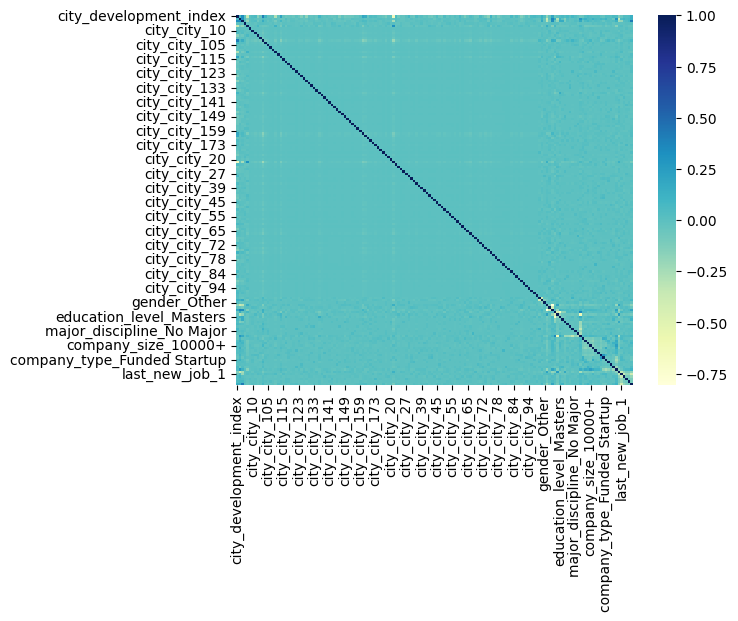

In [ ]:
import seaborn as sns

sns.heatmap(correlation, cmap = 'YlGnBu')

In [ ]:
strong_corr_counts = ((correlation > 0.75) | (correlation < -0.75)).sum(axis=0)

strong_corr_counts
features_to_flag = strong_corr_counts[strong_corr_counts >= 3].index.tolist()
features_to_flag

[]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = careers["will_change_career"]
x = careers.drop(columns = 'will_change_career')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 20, stratify = y)

scaler = StandardScaler()

careers[['city_development_index', 'training_hours']] = scaler.fit_transform(careers[['city_development_index', 'training_hours']])

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.76


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)

print( accuracy_score(y_test, predictions))

0.7813333333333333


# **Decision Tree**

In [ ]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_test)

print( accuracy_score(y_test, predictions))

0.7266666666666667


# **Neural Network**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy



model = Sequential([
    Dense(128, activation='softmax', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(0.001),
    loss=BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)



history = model.fit(
    X_train, y_train,
    epochs = 10,
    batch_size = 32,
)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:780: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6948 - loss: 0.6418
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7576 - loss: 0.5188
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7905 - loss: 0.4534
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8152 - loss: 0.4154
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8153 - loss: 0.4043
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8376 - loss: 0.3703
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8400 - loss: 0.3574
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8405 - loss: 0.3718
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8427 - loss: 0.3442
Epoch 10/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8648 - loss: 0.3132
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7705 - loss: 0.5178
Test Accuracy: 0.7840


## **Model Evaluation**

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


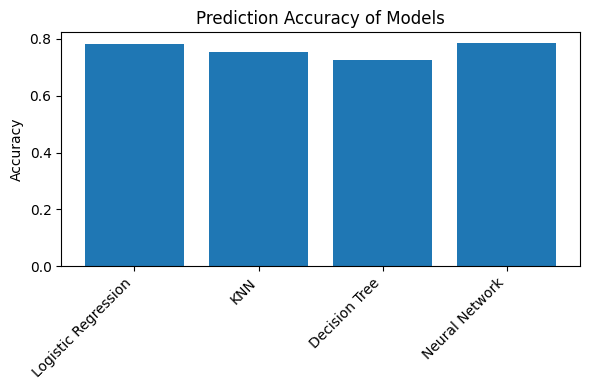

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


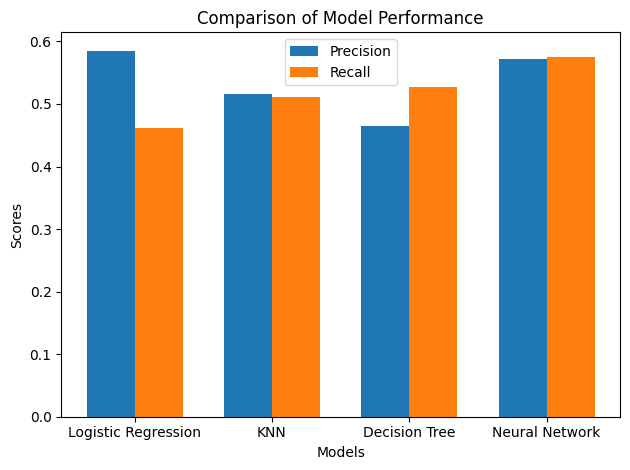

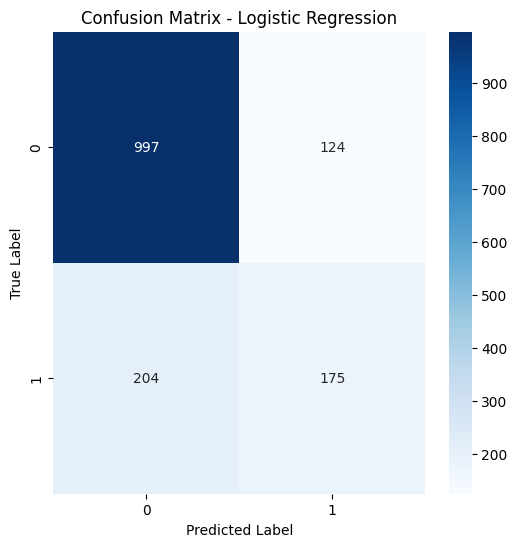

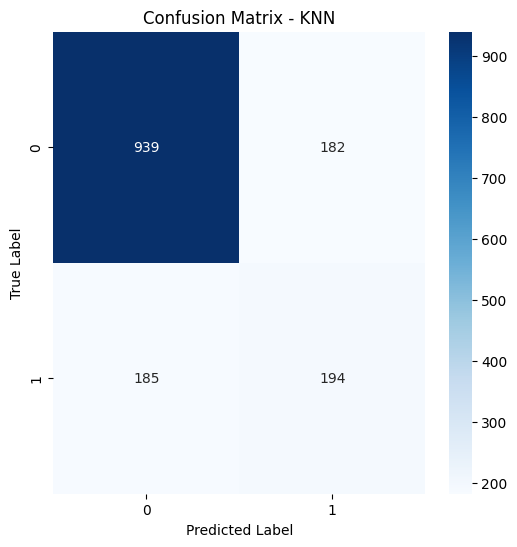

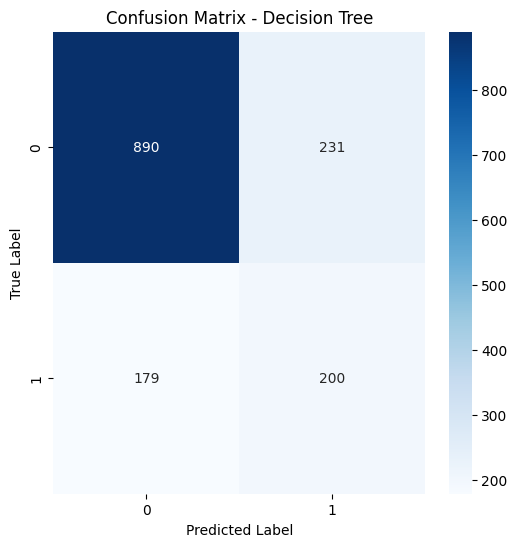

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


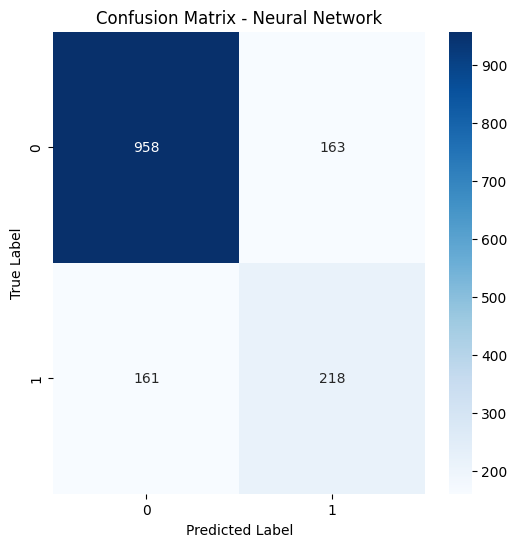

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


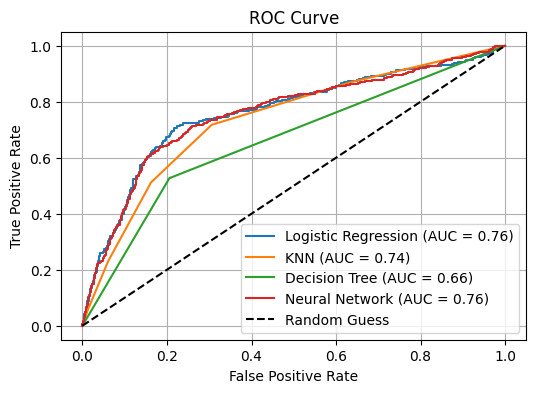

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

# Assuming you have trained models named 'model1', 'model2', etc.
# and their predictions are stored in 'predictions1', 'predictions2', etc.
models = {
    'Logistic Regression': log_reg,  # Assuming 'model' is defined
    'KNN': knn,
    'Decision Tree': dtc,
    'Neural Network': model,# Assuming 'knn' is defined
    # Add more models here
}
bar_width = 0.35
index = np.arange(len(models))

# 1. Bar Chart of Prediction Accuracy
accuracies = []
for name, model in models.items():
    if name in ['Logistic Regression', 'Neural Network']:  # Include Neural Network
        predictions = model.predict(X_test)
        predictions = (predictions > 0.5).astype(int)  # Convert to binary (0 or 1)
        predictions = predictions.flatten()  # Flatten predictions for Neural Network
    else:
        predictions = model.predict(X_test)  # For other models, use their predictions directly
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

plt.figure(figsize=(6, 4))
plt.bar(models.keys(), accuracies)
plt.title('Prediction Accuracy of Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Precision and Recall Comparison
precisions = []
recalls = []
for name, model in models.items():
    if name in ['Logistic Regression', 'Neural Network']:  # Include Neural Network
        predictions = model.predict(X_test)
        predictions = (predictions > 0.5).astype(int)  # Convert to binary (0 or 1)
        predictions = predictions.flatten()  # Flatten predictions for Neural Network
    else:
        predictions = model.predict(X_test)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    precisions.append(precision)
    recalls.append(recall)

fig, ax = plt.subplots()
rects1 = ax.bar(index, precisions, bar_width, label='Precision')
rects2 = ax.bar(index + bar_width, recalls, bar_width, label='Recall')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

# 3. Confusion Matrix
for name, model in models.items():
    if name in ['Logistic Regression', 'Neural Network']:  # Include Neural Network
        predictions = model.predict(X_test)
        predictions = (predictions > 0.5).astype(int)  # Convert to binary (0 or 1)
        predictions = predictions.flatten()  # Flatten predictions for Neural Network
    else:
        predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# 4. AUC Score and ROC Curve
plt.figure(figsize=(6, 4))
for name, model in models.items():
    try:
        y_probs = model.predict_proba(X_test)[:, 1]  # Assuming scaled data is used
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    except AttributeError:
        y_probs = model.predict(X_test)
        y_probs = y_probs.flatten()
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Neural Network (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()